<a href="https://colab.research.google.com/github/lykos007/SalesAnalysisProject/blob/main/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

excel_file_path = '1688639662_ausapparalsales4thqrt2020.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)



In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


No rows contain null data


In [4]:
# Assuming df is your DataFrame
# Group by 'Group' and sum the 'Sales'
sales_by_group = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)

# Display the result
print(sales_by_group)


Group
 Men        85750000
 Women      85442500
 Kids       85072500
 Seniors    84037500
Name: Sales, dtype: int64


# **Seniors had the lowest sales of any group.  Men had the most sales.  But as we can see from the following visualization there was not much variance in the sales by group**

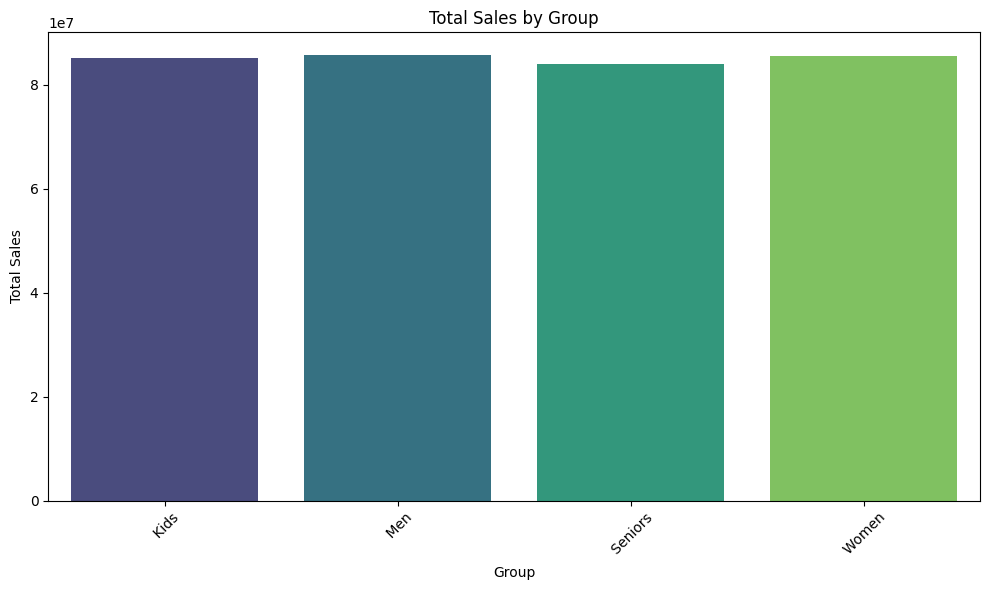

In [5]:
grouped_by_group = df.groupby('Group')['Sales'].sum().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Sales', data=grouped_by_group, palette='viridis')
plt.title('Total Sales by Group')
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [6]:
# Assuming df is your DataFrame and 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Resample to weekly frequency and sum the 'Sales'
weekly_sales_by_group = df.groupby('Group').resample('W')['Sales'].sum()

# Display the result
print(weekly_sales_by_group)


Group     Date      
 Kids     2020-10-04    3690000
          2020-10-11    7020000
          2020-10-18    6707500
          2020-10-25    6525000
          2020-11-01    5490000
          2020-11-08    5125000
          2020-11-15    5315000
          2020-11-22    5302500
          2020-11-29    5577500
          2020-12-06    7362500
          2020-12-13    8030000
          2020-12-20    7765000
          2020-12-27    7630000
          2021-01-03    3532500
 Men      2020-10-04    3730000
          2020-10-11    6807500
          2020-10-18    6710000
          2020-10-25    6872500
          2020-11-01    5507500
          2020-11-08    5335000
          2020-11-15    5242500
          2020-11-22    5025000
          2020-11-29    5482500
          2020-12-06    7505000
          2020-12-13    7802500
          2020-12-20    7990000
          2020-12-27    8337500
          2021-01-03    3402500
 Seniors  2020-10-04    3782500
          2020-10-11    6737500
          2020-10-1

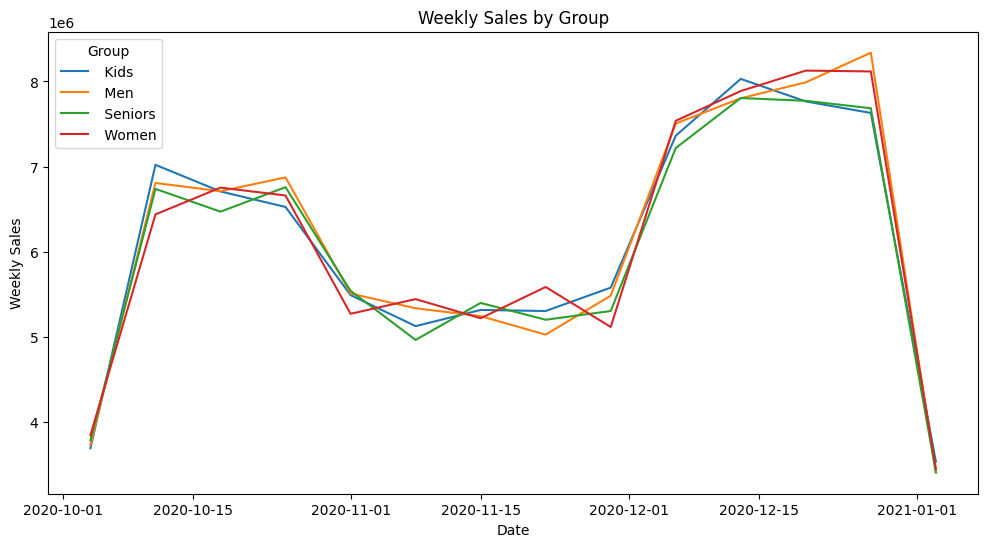

In [7]:


# Resample to weekly frequency and sum the 'Sales'
weekly_sales_by_group = df.groupby('Group').resample('W')['Sales'].sum().reset_index()

# Plotting using seaborn with line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', hue='Group', data=weekly_sales_by_group)

# Setting labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Group')

# Display the plot
plt.show()


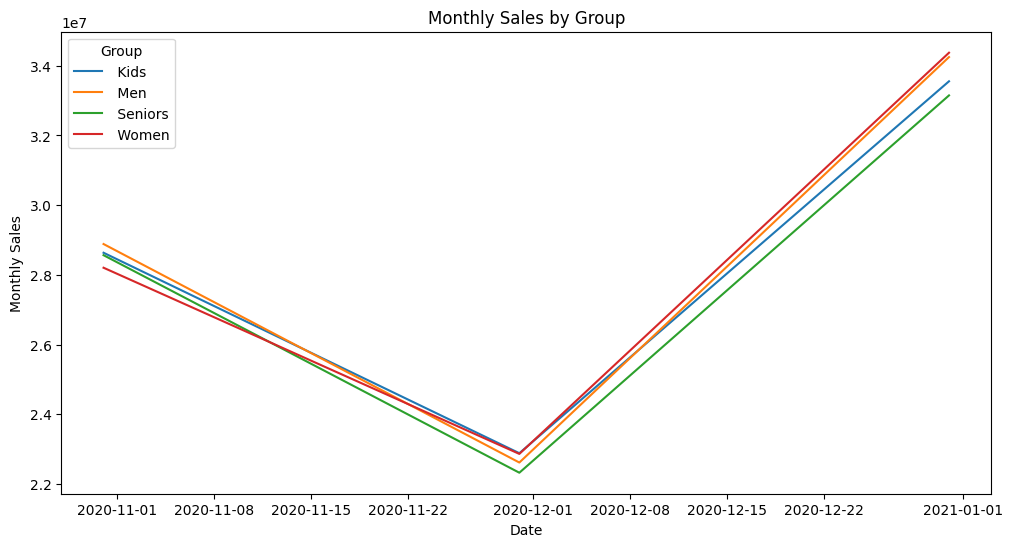

In [8]:
# Resample to monthly frequency and sum the 'Sales'
monthly_sales_by_group = df.groupby('Group').resample('M')['Sales'].sum().reset_index()

# Plotting using seaborn with line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', hue='Group', data=monthly_sales_by_group)

# Setting labels and title
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales by Group')

# Display the plot
plt.show()


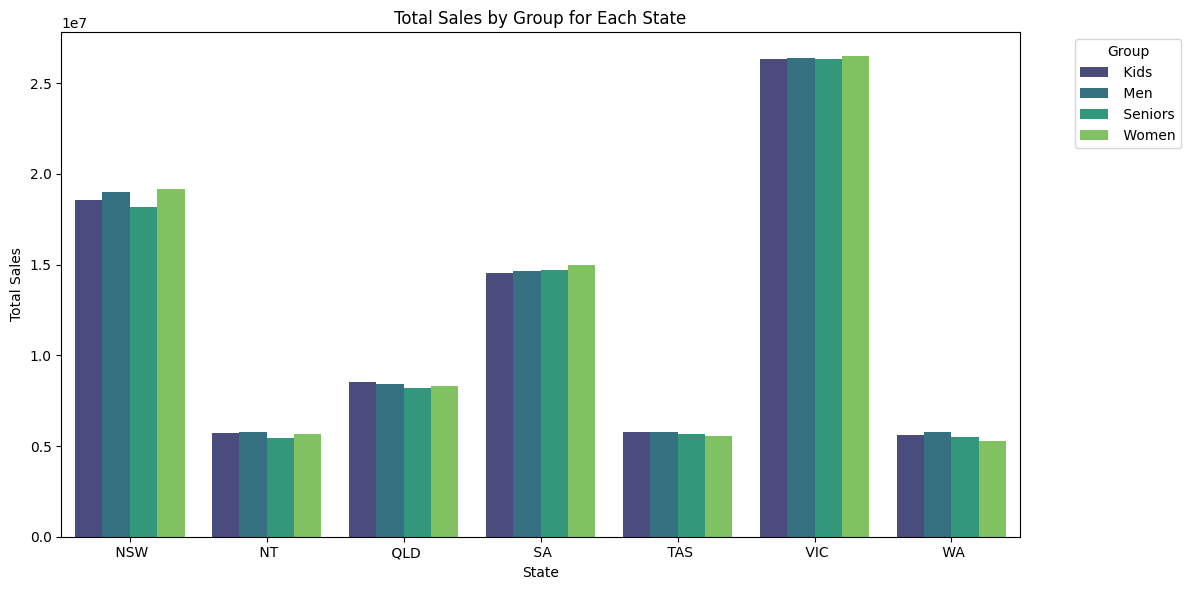

In [9]:
# Group the DataFrame by 'State', 'Group', and calculate total sales for each group
grouped_by_state_group = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# Create a grouped bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=grouped_by_state_group, palette='viridis')
plt.title('Total Sales by Group for Each State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **The above three graphs confirm that there is not much variance between Groups even weekly or monthly**

In [10]:
# Assuming df is your DataFrame
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print(sales_by_state)


State
 VIC    105565000
 NSW     74970000
 SA      58857500
 QLD     33417500
 TAS     22760000
 NT      22580000
 WA      22152500
Name: Sales, dtype: int64


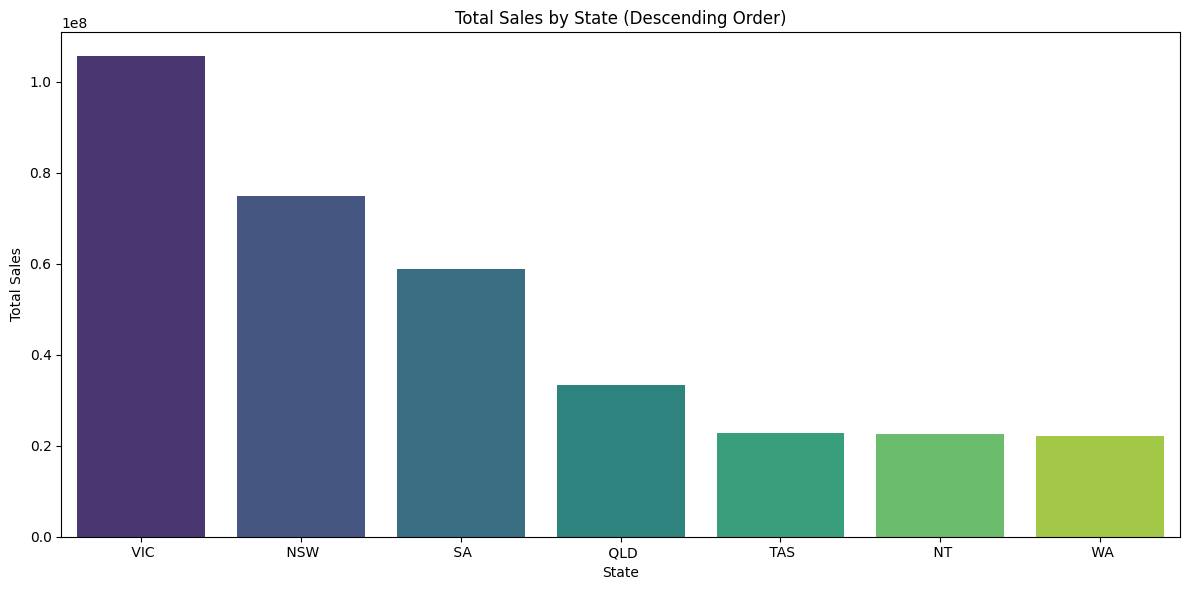

In [11]:
# Assuming df is your DataFrame
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', data=sales_by_state, palette='viridis')
plt.title('Total Sales by State (Descending Order)')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


# **From the table and plot above we can see that Victoria had the highest sales and Western Australia the lowest.**

<ipython-input-12-5e9af8bafdbb>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date'].dt.week


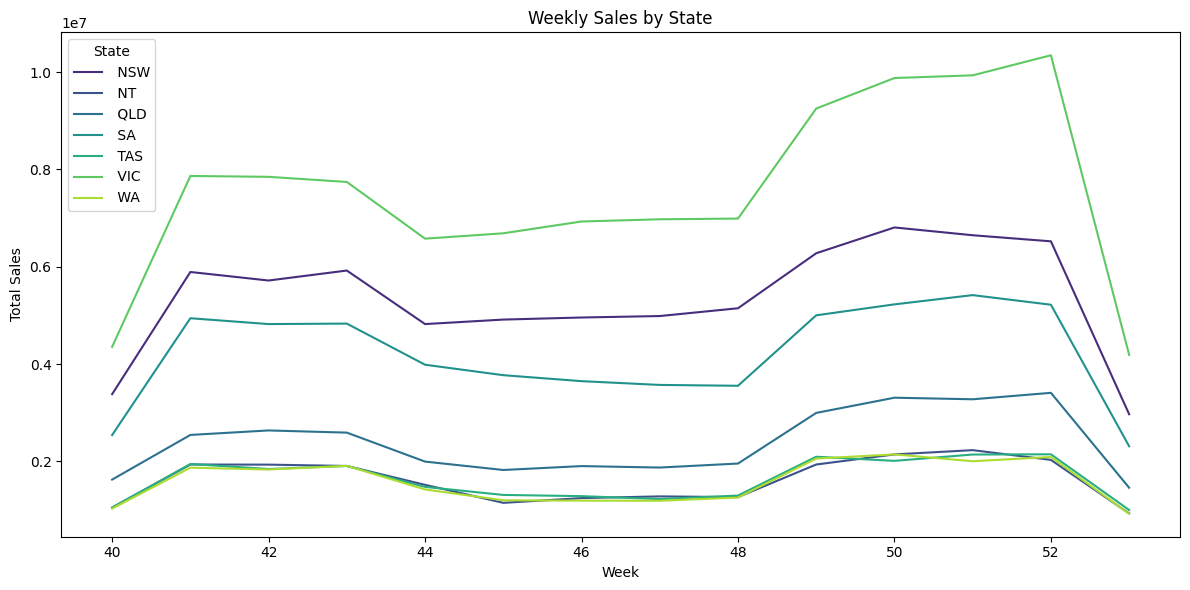

In [12]:
df = pd.read_excel(excel_file_path)
df['Date'] = pd.to_datetime(df['Date'])

# Extract week from the date
df['Week'] = df['Date'].dt.week

# Calculate weekly sales by state
weekly_sales_by_state = df.groupby(['State', 'Week'])['Sales'].sum().reset_index()

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week', y='Sales', hue='State', data=weekly_sales_by_state, palette='viridis')
plt.title('Weekly Sales by State')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

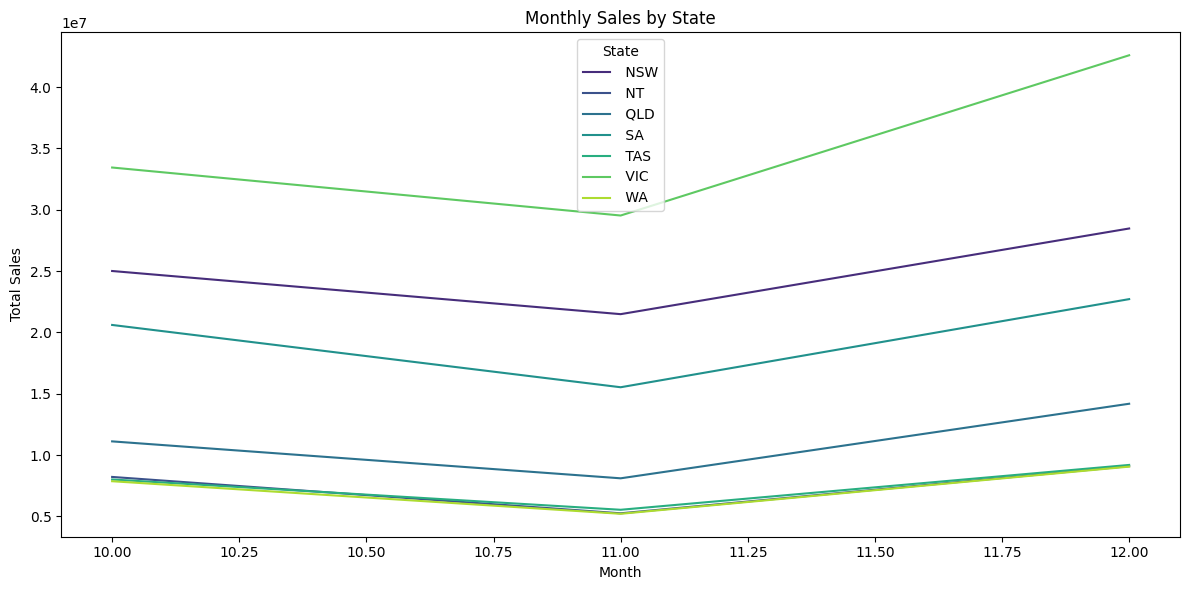

In [13]:
# Assuming df is your DataFrame with a 'Date' column
# Make sure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from the date
df['Month'] = df['Date'].dt.month

# Calculate monthly sales by state
monthly_sales_by_state = df.groupby(['State', 'Month'])['Sales'].sum().reset_index()

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='State', data=monthly_sales_by_state, palette='viridis')
plt.title('Monthly Sales by State')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


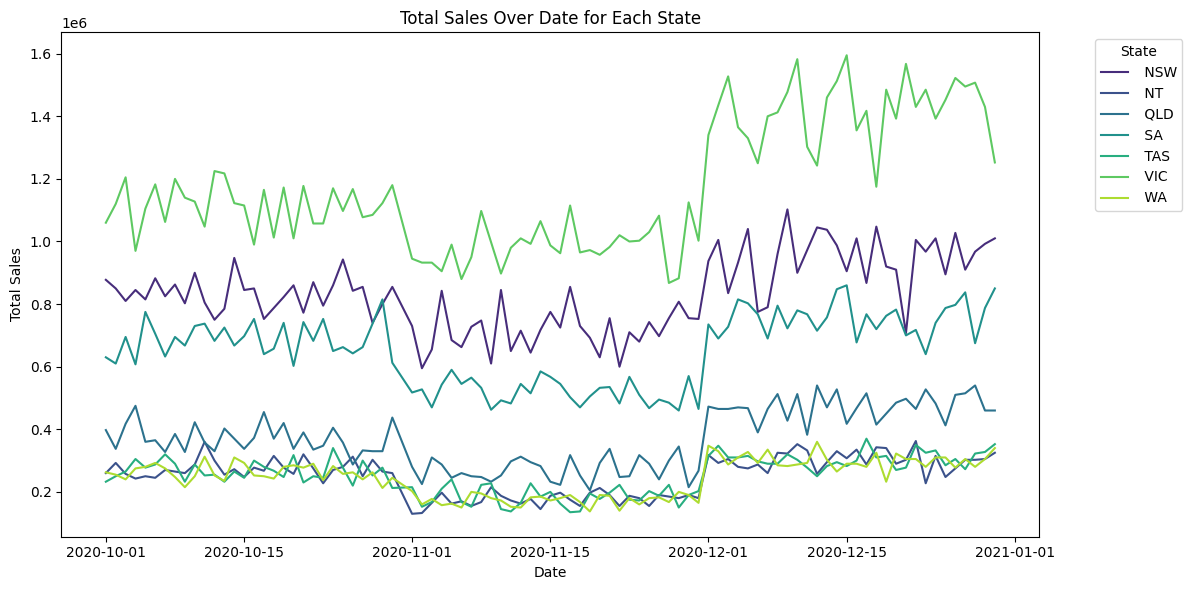

In [14]:
grouped_by_state_date = df.groupby(['State', 'Date'])['Sales'].sum().reset_index()

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', hue='State', data=grouped_by_state_date, palette='viridis')
plt.title('Total Sales Over Date for Each State')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **The above graphs show that all  the states sales trends are similar over time.**

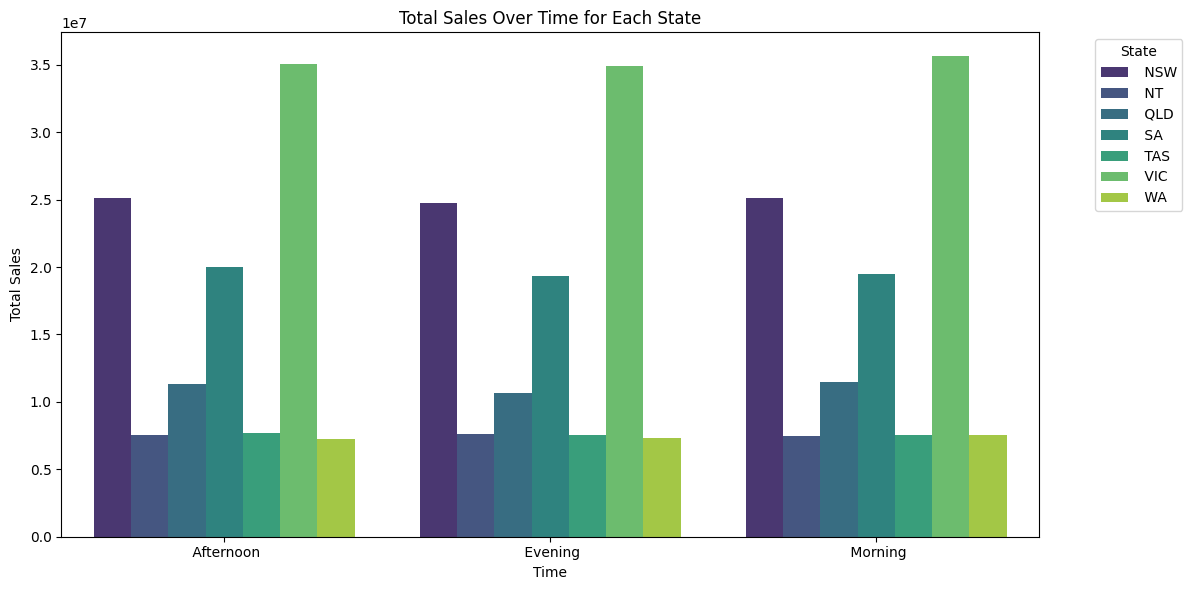

In [15]:
# Group the DataFrame by 'State' and 'Time' and calculate total sales for each group
grouped_by_state_time = df.groupby(['State', 'Time'])['Sales'].sum().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Time', y='Sales', hue='State', data=grouped_by_state_time, palette='viridis')
plt.title('Total Sales Over Time for Each State')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Also, the day part sales trends are similar across the states.**

<ipython-input-16-c24fde30236b>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


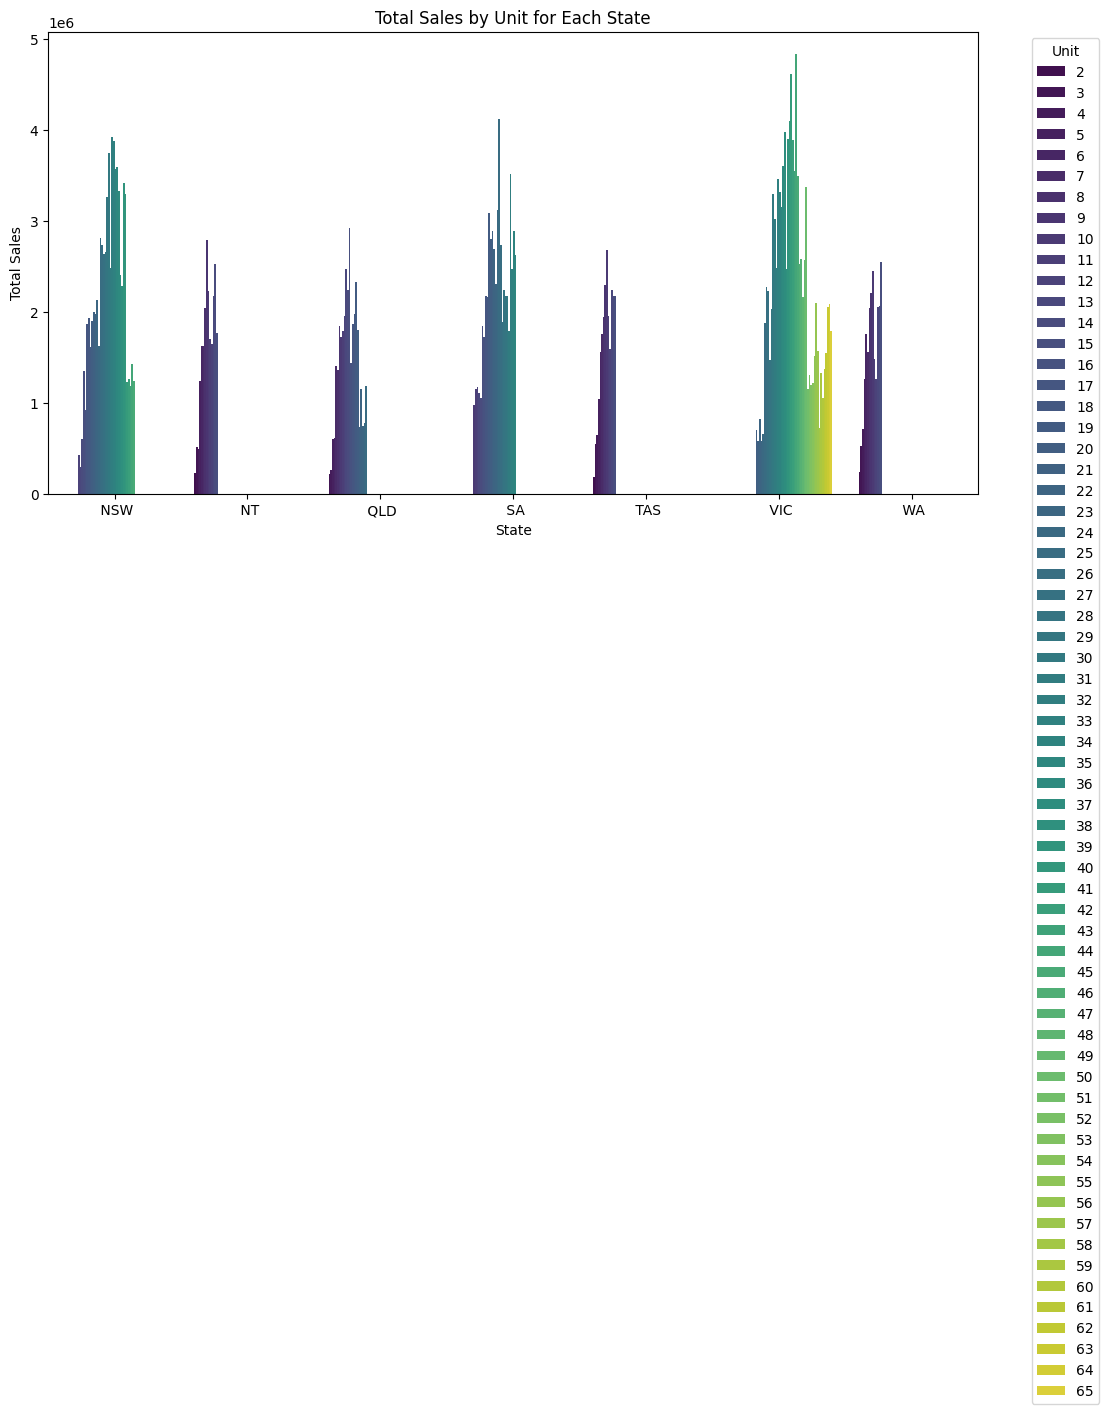

In [16]:
grouped_by_state_unit = df.groupby(['State', 'Unit'])['Sales'].sum().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Unit', data=grouped_by_state_unit, palette='viridis')
plt.title('Total Sales by Unit for Each State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Unit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **The above graph shows some very interesting results however.  There is a huge variance in sales of units per stae.  The graph suggests that some states had 0 sales for some units.  Analysis to follow**

In [17]:
# Assuming df is your DataFrame
unique_units_sorted = sorted(df['Unit'].unique())

# Display the sorted list of unique units
print(unique_units_sorted)


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]


# **There are 64 unique units.  They have unit numbers of 2-65**

In [23]:
# Create a pivot table
pivot_table = pd.pivot_table(df, values='Sales', index='Unit', columns='State', aggfunc='sum', fill_value=0)

# Filter units with sales > 0 in exactly one state
filtered_units = pivot_table[(pivot_table > 0).sum(axis=1) == 1].index

# Filter the pivot table based on the selected units
filtered_pivot_table = pivot_table.loc[filtered_units]

# Display the filtered pivot table
print(filtered_pivot_table)


State   NSW   NT   QLD   SA   TAS      VIC   WA
Unit                                           
46        0    0     0    0     0  2530000    0
47        0    0     0    0     0  2585000    0
48        0    0     0    0     0  2160000    0
49        0    0     0    0     0  2572500    0
50        0    0     0    0     0  3375000    0
51        0    0     0    0     0  1147500    0
52        0    0     0    0     0  1300000    0
53        0    0     0    0     0  1192500    0
54        0    0     0    0     0  1215000    0
55        0    0     0    0     0  1512500    0
56        0    0     0    0     0  2100000    0
57        0    0     0    0     0  1567500    0
58        0    0     0    0     0   725000    0
59        0    0     0    0     0  1327500    0
60        0    0     0    0     0  1050000    0
61        0    0     0    0     0  1372500    0
62        0    0     0    0     0  1550000    0
63        0    0     0    0     0  2047500    0
64        0    0     0    0     0  20800

# **The table above shows that only Victoria had sales for unit nos 46-65**

In [24]:
# Filter units with sales > 0 in exactly two states
filtered_units_2_states = pivot_table[(pivot_table > 0).sum(axis=1) == 2].index

# Filter the pivot table based on the selected units
filtered_pivot_table_2_states = pivot_table.loc[filtered_units_2_states]

# Display the filtered pivot table
print(filtered_pivot_table_2_states)


State      NSW   NT   QLD   SA   TAS      VIC   WA
Unit                                              
36     3330000    0     0    0     0  3600000    0
37     2405000    0     0    0     0  3977500    0
38     2280000    0     0    0     0  2470000    0
39     3412500    0     0    0     0  3900000    0
40     3300000    0     0    0     0  4100000    0
41     1230000    0     0    0     0  4612500    0
42     1260000    0     0    0     0  3885000    0
43     1182500    0     0    0     0  3547500    0
44     1430000    0     0    0     0  4840000    0
45     1237500    0     0    0     0  3487500    0


# **This table above shows that only Victoria and New South Wales has sales of units 36-45**

In [25]:
# Filter units with sales > 0 in exactly two states
filtered_units_3_states = pivot_table[(pivot_table > 0).sum(axis=1) == 3].index

# Filter the pivot table based on the selected units
filtered_pivot_table_3_states = pivot_table.loc[filtered_units_3_states]

# Display the filtered pivot table
print(filtered_pivot_table_3_states)


State      NSW      NT      QLD       SA     TAS      VIC      WA
Unit                                                             
2            0  225000        0        0  185000        0  240000
16      920000       0  1440000  1720000       0        0       0
17     1870000       0  1870000  2167500       0        0       0
18     1935000       0  1980000  2160000       0        0       0
19     1615000       0  2327500  3087500       0        0       0
26     2730000       0        0  2730000       0  2275000       0
27     2632500       0        0  1890000       0  2227500       0
28     2660000       0        0  2240000       0  1470000       0
29     3262500       0        0  2175000       0  2030000       0
30     3750000       0        0  2175000       0  3300000       0
31     2480000       0        0  1782500       0  3022500       0
32     3920000       0        0  3520000       0  2480000       0
33     3877500       0        0  2475000       0  3465000       0
34     357

# **This table above shows that only Victoria, New South Wales and South Australia has sales of units 26-35**

# **Using the above tables the recommended approach would be either to not stock the items in the states which no sales are occurring or if management feels the items can sell, a direct marketing campaign to the states where no sales are happenning sould begin.**